# TensorFlow Basics and Model Training

## Introduction

TensorFlow (TF) is a numerical processing library that is widely used by machine learning and deep learning researchers or practitioners. TF is used for training and running deep neural networks. This project aims to cover the introduction of TF version 1.x and 2.0.

## Breakdown of this Notebook:
- Introduction to TensorFlow 2 and Keras packages
- Creating and Training a simple Computer Vision (CV) model.
- Tensorflow and Keras core concepts (Building Keras Models and Layers in Different Ways)
- The TensorFlow ecosystem.

## Dataset:

The dataset can be obtain from the link: http://yann.lecun.com/exdb/mnist/

The MNIST Digits dataset contains 70,000 greyscale images that have 28 x 28 pixels for each of the image. This dataset has been a reference set over the last few years to test and improve methods for this recognition task. The Input vector for the network works out to be 28 x 28 = 784 values and it has an output of 10 values (where there are 10 different digits ranging from 0 to 9). Further, the number of hidden layers for this network will be up to the modeller. 

## Requirements:
1. TensorFlow 2.0
2. If running on GPU, requires the CUDA enabled "tensorflow-gpu"


## For AMD GPU: 
See https://plaidml.github.io/plaidml/docs/install to use it as the Backend for Keras.

In [1]:
# For those who has AMD GPU and uses PlaidML for the Keras Backend: run the following code to use AMD GPU instead.
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## 1 - Introduction to TensorFlow 2 and Keras:

This section will briefly cover the framework and provides a basic example.

## 1.1 - TensorFlow Introduction:

TF can be described as a means of deployment of Machine Learning (ML) solutions on different types of platforms such as Computer CPUs or GPUs, Mobile devices and Browsers. It also presents with the capability of being scaled up for a larger distributed computer systems. 

## 1.2 - TF Architecture:

The architecture presents with several levels of abstraction and this can be seen in the following diagram.

In [2]:
import tensorflow as tf

print(tf.__version__)

2.0.0


In [3]:
import os
from IPython.display import Image




# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

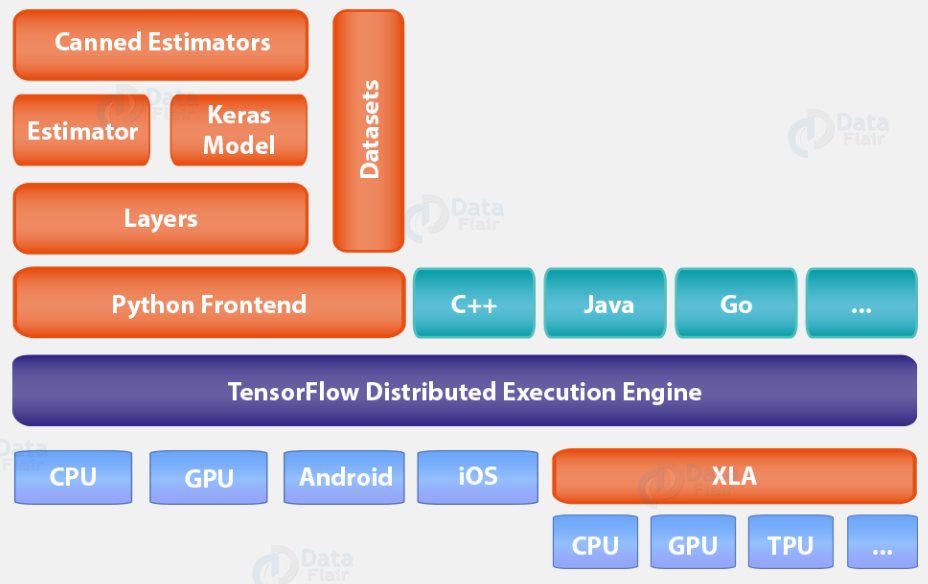

Image ref -> https://data-flair.training/blogs/tensorflow-api/


In [4]:
# TF Architecture: 
display(Image(image_path + 'TF Architecture.png', width=700, unconfined=True))
print('Image ref -> https://data-flair.training/blogs/tensorflow-api/')

### The above diagram can be simplified into the following:

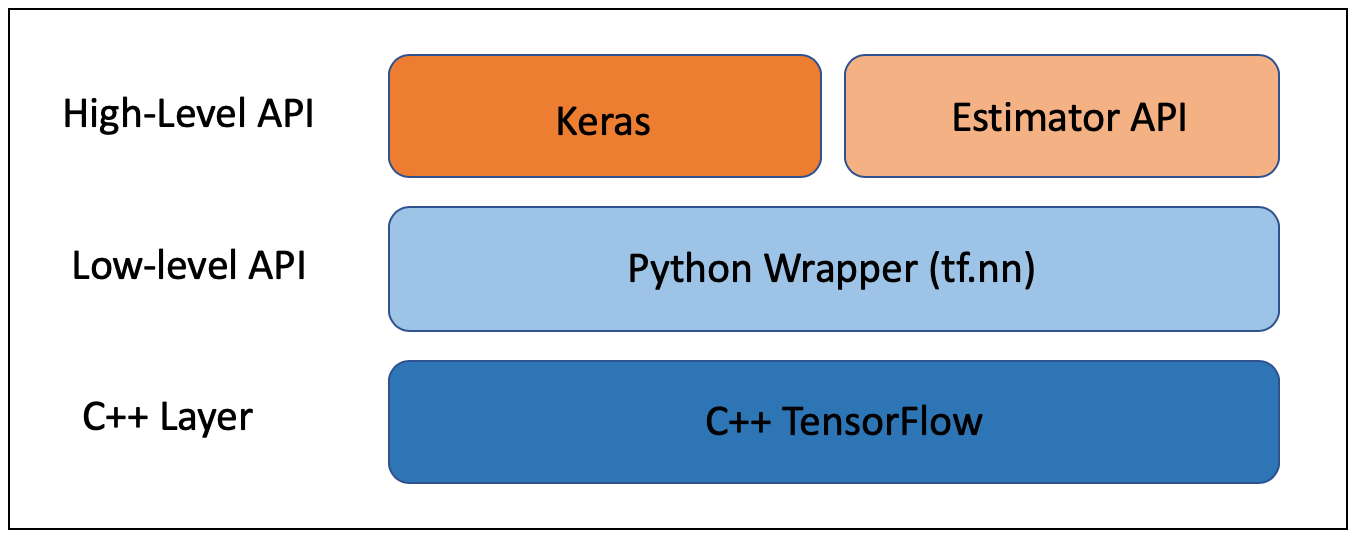

Image ref -> https://data-flair.training/blogs/tensorflow-api/


In [5]:
# TF Architecture Simplified: 
display(Image(image_path + 'TF Architecture Simplified.png', width=700, unconfined=True))
print('Image ref -> https://data-flair.training/blogs/tensorflow-api/')

From the diagram, the lowest level begins with the C++ layer, then the next level being the Low-Level API Python Wrapper and lastly the High-Level API Keras and Estimator API.

### For the C++ layer:

These computations are originally coded in C++ language. Further, to perform these operations on a GPU equiped system, TF utilises the CUDA library developed by NVIDIA. 

### For the Python Wrapper Layer:

At this level, a Python low-level API is used to wrap the C++ sources, so that when a Python method is called in TF, it will invoke the C++ code behind the scenes. THis allows for users to code with Python rather the more complex C++ language. Python also does not require any compilation.

### For the Keras and Estimator API:

At this level, there are two components that are the Keras and Estimator API. Firstly, Keras can be described as a user-friendly, modular style, and extensible wrapper for TF itself. Secondly, the Estimator API has pre-made components that streamlines the building of machine learning models. These can be considered as building blocks or rather, templates.

## 2.1 - Keras Introduction:

Keras is an interface to allow for quick experimentation of Neural Networks (NN). It relies on TF and Theano frameworks to perform and run deep learning operations. Keras is great for beginners due to its user friendliness.

### NOTE: 

In this project, the standalone version of Keras will not be used, where instead the implementation are done with "tf.keras". This is to better integrate and be more compatible with TF's other modules and the methods of saving models made. 

## 2.2 - Building a Simple CV model with Keras:

The dataset used here is the MNIST Digits. It is made of 60,000 images to be used for training and 10,000 images to be used as the testing set.


## 2.2.1 - Import the required Libraries:

In [6]:
import tensorflow as tf

## 2.2.2 - Load in the Dataset:

In [7]:
# Define the number of classes:
nb_classes = 10

# Define the sizes of each images:
img_rows, img_cols = 28, 28

# Define the colour channels: greyscale = 1/
nb_channels = 1

# Define the input shape of each image:
input_shape = (img_rows, img_cols, nb_channels)


# Load the Dataset:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalise the data:
x_train, x_test = x_train / 255.0 , x_test / 255.0

## 2.2.3 - Building the Model:

Here, the model will be constructed with a simple architecture consisting of 2 Fully connected (Dense) layers, where one for the hidden layer and another for the ouput layer.

### Model in detail:

1. __Flatten__ - It takes in the 2D matrix that represents the image pixels and flattens it into a 1D array. Changing it from a 28 x 28 format to a 784 sized vector (28 x 28 = 784). 
2. __1st Dense__ - This will convert the 784 pixel values into 128 activations by multiplying the weight matrix (sized at 128, so the operation is 128 x 784) and by adding the bias matrix (sized at 128). This should output 100,480 parameters.
3. __2nd Dense__ - This will convert the 128 activations of the hidden layer into the final prediction wanted. It will output it as probabilities as the Softmax function is called ass the activation function.

In [8]:
# Instantiate the model:
model = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

## 2.2.4 - Training the Model:

It can be seen below, that the "compile()" method hass a few arguments:
1. optimizer - set to perform the gradient descent algorithm.
2. loss - set to be cross-entropy function to compute the loss.
3. metrics - return the evaluation metric that is accuracy.

The "fit()" method will fit/train the model on the training dataset. Here it is set to 5 epochs to iterate the whole dataset five times. Verbose is set to 1 to return the progress bar or ETA.

### NOTE:

The "sparse_categorical_crossentropy" set below is the same as "categorical_crossentropy", however it directly takes in the ground truth labels as its inputs, whereas  categorical_crossentropy requires a one-hot encoded labels.

In [9]:
# Compile the model:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Traing the Model:
model.fit(
    x= x_train,
    y= y_train,
    epochs= 5,
    verbose= 1,
    validation_data= (x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.6436 - accuracy: 0.8377 - val_loss: 0.3612 - val_accuracy: 0.9016
Epoch 2/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3431 - accuracy: 0.9037 - val_loss: 0.2983 - val_accuracy: 0.9182
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2937 - accuracy: 0.9177 - val_loss: 0.2639 - val_accuracy: 0.9260
Epoch 4/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2622 - accuracy: 0.9258 - val_loss: 0.2434 - val_accuracy: 0.9290
Epoch 5/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2378 - accuracy: 0.9334 - val_loss: 0.2207 - val_accuracy: 0.9375


### Observation - Model's Performance:

As it can be seen, only after 5 epochs, the model is able to obtain an accuracy score of 93.29% and a alidation accuracy of 93.66%. 

## 2.2.5 - Longer training time:

Lets experiment to see if increasing the number of epochs can improve the performance.

In [10]:
# Instantiate the model:
model2 = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model2.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model2.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model2.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

In [11]:
# Compile the model:
model2.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Traing the Model:
model2.fit(
    x= x_train,
    y= y_train,
    epochs= 10,
    verbose= 1,
    validation_data= (x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.6635 - accuracy: 0.8293 - val_loss: 0.3625 - val_accuracy: 0.9024
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3415 - accuracy: 0.9049 - val_loss: 0.2958 - val_accuracy: 0.9183
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2925 - accuracy: 0.9174 - val_loss: 0.2659 - val_accuracy: 0.9260
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2631 - accuracy: 0.9251 - val_loss: 0.2423 - val_accuracy: 0.9325
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2408 - accuracy: 0.9314 - val_loss: 0.2271 - val_accuracy: 0.9369
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2230 - accuracy: 0.9363 - val_loss: 0.2102 - val_accuracy: 0.9415
Epoch 7/10
60000/60000 [==========================

### Observation - Model's Performance:

As it can be seen, only after 10 epochs, the model is able to obtain an accuracy score of 95.40% and a alidation accuracy of 95.37%. This is much better than previously seen. Perhaps increasing the epochs further would achieve a better score. 

## Model Summary:

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  100480    
_________________________________________________________________
dense_3 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 3 - TensorFlow 2 and Keras:

Version TF 2 evolves to focus on simplicity and usability when compared to TF 1. This section will focus on what TensorFlow relies on to funciton.

## 3.1 - Tensors:

Tensors are mathematical objects (such as N-dimensional arrays) where it can be a scalar, vector, 3D matrix or N-dimensional matrix. A Tensor would therefore be used to store mathematical values. 

A Tensor can contain __fixed values (tf.constant)__ or __changable values (tf.Variable)__. A Tensor object should be have following:
1. Type -> can be a string, float32, float 16 or int8 etc.
2. Shape -> a scalar (n), a vector of size n (n, m) to make a 2D matrix.
3. Rank -> which is the number of dimensions, like 0 for scalar, 1 for vector and 2 for 2D matrix.

Another good example is for tensors to have __unknown shape__ such as (None, None, 3) for __Images__ of variable sizes. Here the "3" is for red, green and blue.

## 3.2 - TensorFlow Graphs:

For tasks such as Computer vision, it consists of multiple operations where for each operation, it transforms the input into output. TF will represent these operations as Directed Acyclic Graph (DAC) or referred to __graphs__. However, in TF 2, these graphs operations were moved to simplify the framework for usage. 

Below shows an example of the Graph:

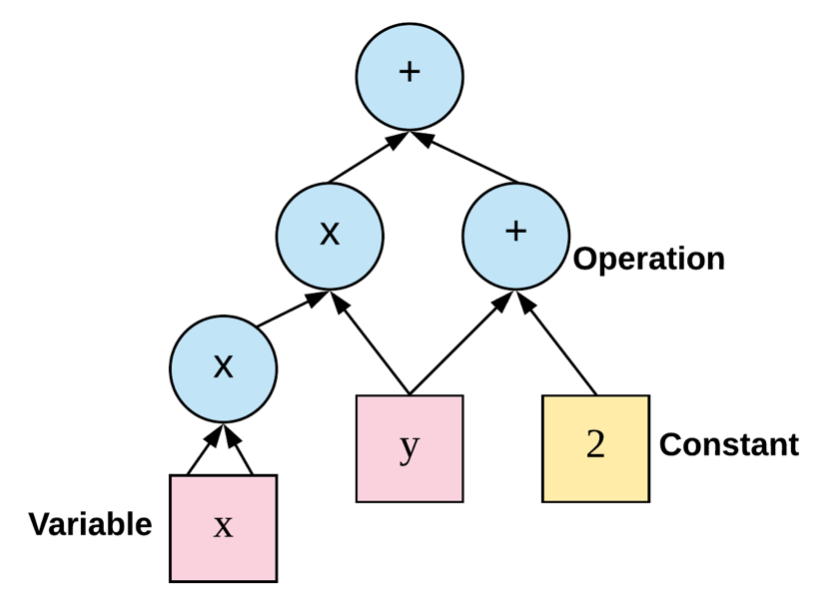

Image ref -> https://www.easy-tensorflow.com/tf-tutorials/basics/graph-and-session


In [13]:
# TF Graph: 
display(Image(image_path + 'TF Graph.png', width=400, unconfined=True))
print('Image ref -> https://www.easy-tensorflow.com/tf-tutorials/basics/graph-and-session')

The graph is composed of a series of nodes that are connected togther by edges and each of these nodes represents an operation. Relying on graphs have advantages such as:
- Running one part of the operation on the CPU and another part on GPU.
- Running parts of the graph on a distributed model/machines.
- Graph optimisations to avoid unnecessary operations for better performance.

## 3.3 - Lazy and Eager execution:

TF 2 utilises __Eager Execution__ whereas TF 1 utilises __Lazy Execution__. The term "Lazy" means that the operations are not run by the framework until requested. 

### 3.3.1 - For TF 1 (Lazy Execution): 

Taking the example of summing two vectors.
As this is a Lazy execution, the output tensor would relay that it is an "addition operation" without the results.

In [14]:
a = tf.constant( [1, 2, 3] )
b = tf.constant( [0, 0, 1] )
c = tf.add(a, b)

# print(c)
print('For TF 1 version is: Tensor("Add:0", shape=(3,), dtype=int32)')

For TF 1 version is: Tensor("Add:0", shape=(3,), dtype=int32)


### 3.3.2 - For TF 2 (Eager Execution):

As this is an Eager execution, the output tensor has the result of "[1,2,4]". The Advantages of such an execution method improves debugging and development.

In [15]:
a = tf.constant( [1, 2, 3] )
b = tf.constant( [0, 0, 1] )
c = tf.add(a, b)

print('For TF 2 version is: ', c)

For TF 2 version is:  tf.Tensor([1 2 4], shape=(3,), dtype=int32)


## 3.4 - Creating Graphs in TF 2:

The following code shows an example of graph creation and optimisation. Here, it is assumed that a, b and c are Tensor matrices and there is a need to compute for d and e. Following an Eager execution method, TF would compute "d" first then proceed onto "e". Whereas in Lazy execution methods, TF would create a graph for the operations and run a graph optimiser beforehand so it would repeat the "a * b + c" twice, the optimiser would also cache the ressult of the computation and recall the results when needed (for example, when the equation is repeated in this case). The optimiser is also able to perform in parallelism for faster compute. 

As TF 2 on the other hand uses __AutoGraph__ instead.

In [16]:
# Used in TF 1:
def compute(a, b, c):
    d = a * b + c
    e = a * b + c
    return d, e

## 3.4.1 - AutoGraph with TF 2:

TF AutoGraph module converts the Eager coding into graph and allows for the same advantages as previously mentioned such as automatic optimisation.

Note: the " @ " is a Python Decorator. This allows functions to be wrapped, the addition of functionalities and its alterations.

The AutoGraph is able to convert most Python statements (for-loops, while-loops, if statements and iterations). Generally, __AutoGraph__ should be used in these scenarios:
- Exporting model(s) to other devices.
- Performance is key and that graph optimisations are need to improve computation speeds.

In [17]:
@tf.function
def compute(a, b, c):
    d = a * b + c
    e = a * b + c
    return d, e

Further, another advantage that graphs (Not TF itself) offers is the __Automatic Differentiation__ method. This is due the inherent built in full list of operations where it provides TF with the capability to easily compute gradients for each variable. 

However, TF2's eager mode is that each of the operation is independent from each other which makes automatic differentiation not possible under default. To overcome this, __Gradient Tape__ is utilised.

## 3.5 - Backpropagation of Errors with Gradient Tape:

Gradient tape allows for eassy backpropagation of a model but in Eager mode. 

### 3.5.1 - Example: 

The following code example wants to solve for the value of X for the equation A x X = B where A and B are constants. To do this, the loss will be minimised as " abs(A x X -B) ".

In [18]:
A, B = tf.constant(3.0), tf.constant(6.0)
X = tf.Variable(20.0)

loss = tf.math.abs(A * X - B)

print(loss)

tf.Tensor(54.0, shape=(), dtype=float32)


In order to update for the value of X, the gradient of the loss should be computed w.r.t X. It can be seen in the above print out, that TF computed the results of the operation rather than just storing it like in Lazy mode. 

__Gradient Tape__ is handy when such a case like having no information on the operation and its inputs, the automatic differentiation of the loss operation is not possible. 

### 3.5.2 - Gradient Tape example:

Running the loss computation in " tf.GradientTape " context would allow TF to automatically record all the operations and allows for the replay of these operations backwards. 

The following code defines a single training sstep where for each " train_step() " being called, the loss would be computed in the " tf.GradientTape " context. The gradient is computed and then the X variable is then updated accordingly. The results then shows X converging towards a value that solves the stated equation.

In [19]:
def train_step():
    with tf.GradientTape() as tape:
        loss = tf.math.abs(A * X - B)
    
    # Derivation of the Loss w.r.t X :
    dX = tape.gradient(loss, X)
    
    print('X = {:.2f}, dX = {:.2f}'.format(X.numpy(), dX))
    
    # Update X:
    X.assign(X - dX)

# Apply the above function:
for i in range(7):
    train_step()

X = 20.00, dX = 3.00
X = 17.00, dX = 3.00
X = 14.00, dX = 3.00
X = 11.00, dX = 3.00
X = 8.00, dX = 3.00
X = 5.00, dX = 3.00
X = 2.00, dX = 0.00


## 4 - Building Keras Models and Layers in Different Ways:

### Sequential APIs.

Previously in Section 2.2.3, the simple model built demonstrated one of the ways to build a Keras Model object. These concluded with a "Model" object that consist of the following:
1. An " .inputs() " and " .outputs() " for the inputs and outputs of the model.
2. A " .layers " list that defines the layers for the model and its shape.
3. A " .summary() " method that will print the model architecture.
4. A " .save() " method that will save the model, architecture and current state of training. It can be used to resume the training later on. Additionally, the model can be instantiated for later.
5. A " .save_weights() " where the model weights are saved.

## 4.1 - Other Keras model types: Functional APIs.

An alternative way of building the model with Keras is to use the Functional API. The following shows an example fo the same model in Section 2.2.3 but in Functional API form. 

Here, it can be noted that the code is longer but it presents with more versatility and expressivility than that of Sequential API. The __differences__ here are that Functional API allows for branching models like architecture with more parallel layers while Sequential API are used for linear models.

### The following Image shows the Sequential API to be compare with the code block below (Functional API):

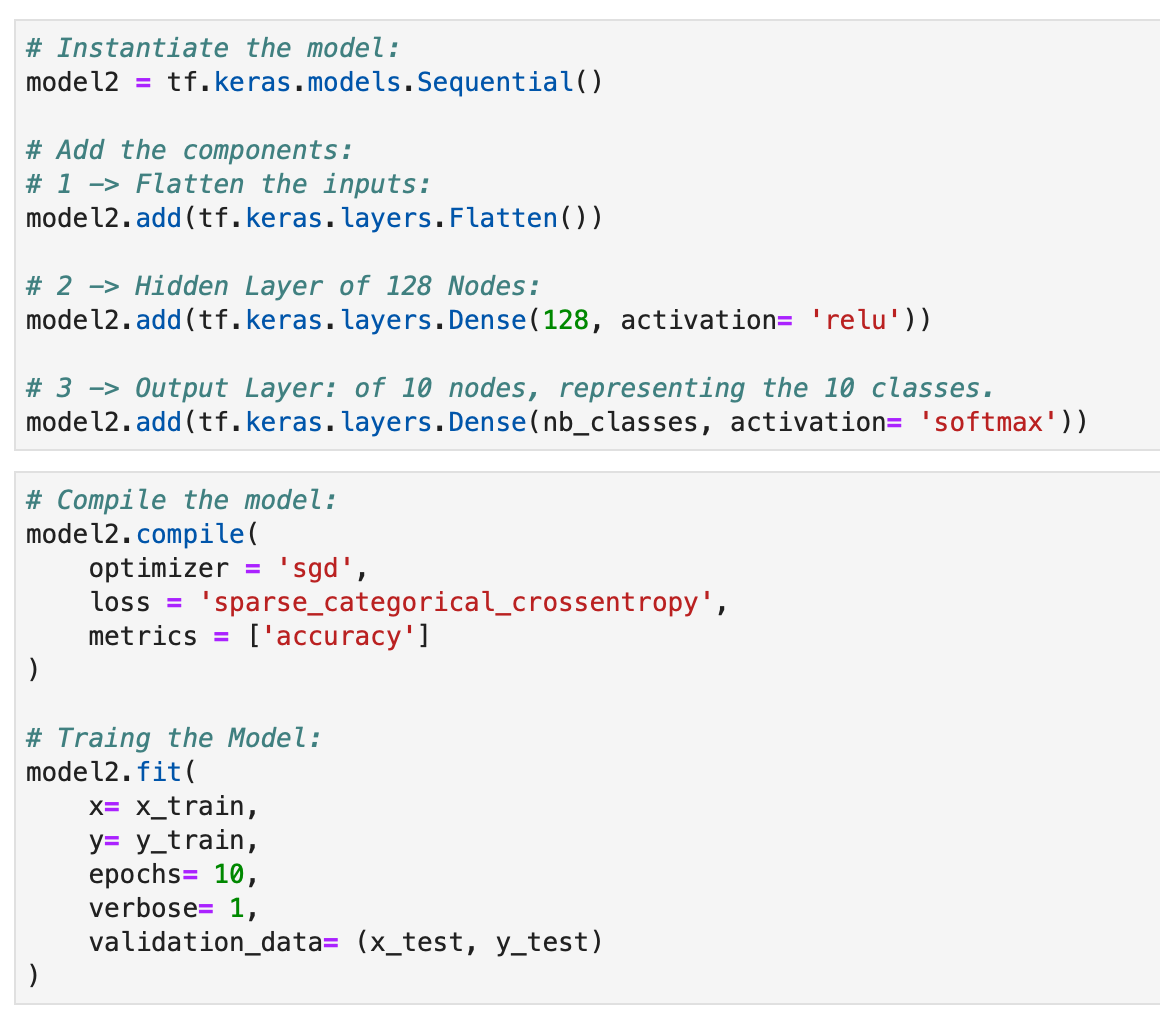

Image ref -> 


In [20]:
# Sequential and Functional API Comparison:
# TF Graph: 
display(Image(image_path + 'Sequential and Functional API.png', width=600, unconfined=True))
print('Image ref -> ')

In [21]:
# Define the Input layer: by its shape.
model_input = tf.keras.layers.Input(shape = input_shape)

# Define the flattening layer: changes 28 x 28 images to a 1d-array of 784 values.
output = tf.keras.layers.Flatten()(model_input)

# Define the Hidden Layer of 128 nodes: with relu activation
output = tf.keras.layers.Dense(128, activation = 'relu')(output)

# Define the output layer: based on the number of classes (10) with a softmax activation.
output = tf.keras.layers.Dense(nb_classes, activation = 'softmax')(output)

# Save the model:
model = tf.keras.Model(model_input, output)

## 4.2 - Other Keras model types: Callbacks.

Callbacks in Keras can be described as Utility Functions. It can be pass with " .fit() " mehtod to include more functionality to its default behaviour. Note that multiple callbacks can be defined, where it has to be placed before or after each of the batch iteration, each training epoch, or rather the whole training procedure. 

The following are predefined Keras Callbacks:
1. "CSVLogger" is where it will log the training information into a CSV file.
2. "EarlyStopping" is to help prevent overfitting by stopping the training process if the loss or other metrics are no longer improving.
3. "LearningRateScheduler" defines different learning rate or changes the learning rate on each of the training epoch according to a set schedule.
4. "ReduceLROnPlateau" is where it will automatically reduce the learning rate when the loss or other metric have ceased to improve.

### Overall, TensorFlow context such as AutoGraph, tf.function decorator and Gradient tape simplifies the creation of graphs and eases management. It makes all the complexities behind the scenes nearly invisible from the user.

## 5 - Advanced Concepts:

This section will explore more of the inner workings of these modules. This may help improve the understanding of the behind the scenes complexities.

## 5.1 - tf.function inner: How it works?

Calling the tf.function for the first time will create a graph and it will correspond with the function's operations. Next, TF will cache the graph to avoid a duplicate create of the same function. The following will demonstrate this:

In [22]:
@tf.function
def identity(x):
    print('Just created the graph!')
    return x

The above function will now print the stated message each time TF creates a Graph that corresponds to this operation. 

In this case, TF is caching the graph where it will print the message on its first run.

In [23]:
x1 = tf.random.uniform( (10, 10) )
x2 = tf.random.uniform( (10, 10) )

In [24]:
results1 = identity(x1)
results2 = identity(x2)

Just created the graph!


### Notice:

See that only one print out was seen as the output.

Next, a slight change is implemented to its datatype.

In [25]:
x3 = tf.random.uniform( (10, 10), dtype= tf.float16 )

results3 = identity(x3)

Just created the graph!


With this slight change, TF have just created another graph.

### This can be explained as TF graphs are defined by its operations, shapes and types of tensors that are recevied as its inputs. When a change is made, a new graph is create and cached. With its defined inputs, tf.functions have essentially become a Concrete Function.

It can also be useful to log the information whenever a concrete function has just run, rather than just the very first time. To do this:

In [26]:
@tf.function
def identity(x):
    print('Running Identity')
    return x

## 5.2 - Variables in TF 2:

For example, to hold onto model weights, TF will use Variable instances. The contents of the model can be listed out by accessing the "model.variables()" and returns a list of all the variables from the model. Here in this case, the variable management is handled by Keras.

In [27]:
# Access and print out the model vairables:
print( [variable.name for variable in model.variables] )

['dense_4/kernel:0', 'dense_4/bias:0', 'dense_5/kernel:0', 'dense_5/bias:0']


It is also possible to create the user's own variables.

In [28]:
a = tf.Variable(3, name = 'my_var')
print(a)

<tf.Variable 'my_var:0' shape=() dtype=int32, numpy=3>


### For larger projects:

It is highly recommended to name variables to help clarify the code and simplify debugging. To alter the valueof a variable, the "Variable.assign" method is used.

In [29]:
a.assign(a + 1)
print(a.numpy())

4


If " .assig() " was not used, then a new Tensor method would be created.

In [30]:
b = a + 1
print(b)

tf.Tensor(5, shape=(), dtype=int32)


### Lastly, the object itself will be deleted from active memory if the Python reference to the variable was removed. This will release more space in memory for other variables to be assigned/created.

## 5.3 - Distribution Strategies:

To leverage distributed computing power, for cases with larger models and datasets (more computer servers for more power), the "tf.distribute.Strategy" API can be utilised. It defines how many machines can communicate with each other to train the model more efficiently.

List of Strategies are:
1. "MirroredStrategy" is used for training on multiple GPUs on a single machine. The model weights are then kept in sync between each of the devices (individual GPUs).
2. "MultiWorkerMirroredStrategy" is similar to (1) by used for traing the model on multiple machines.
3. "ParameterServerStrategy: is muli-machine training but the model weights are kept on a parameter server.
4. "TPUStrategy" where TPU is a Tensor Processing Unit (made by Google), it trains the models on these Compute units.

### For a distribution strategy, it is possible to create and compile the model like so:

It should be noted that there may be a need to increase the batch size of the input data for each of the devices to train on. The learning rate can also be changed.

__Uncomment below to see code__

In [31]:
# mirrored_strat = tf.distribute.MirroredStrategy()

# with mirrored_strat.scope():
#     # Make the model here/below:
#     model = make_model()
    
#     # Compile it:
#     model.comile( [...] )

## 5.4 - Usage of the Estimator API:

The Estimator API is a high-level alternative to Keras API. It serves to simpify the training, evaluation, prediciton and serving process. Here there are __Two__ types of Estimators such as:

1. Pre-made Estimators, simple models that are provided by TF that allows for quick implementation to try out Machine Learning Architectures.
2. Custom Estimators, that can be created with any model architecture.

Estimators are great when it comes to handling the smaller details of the model's life cycle such as Data queues, exception handlings, recovery from failures, periodic checkpoints etc. However, this is only recommended in TF1 and not TF2 (better with Keras API).

## 5.4.1 - Pre-made Estimators:

The available pre-made Estimators can be "DNNClasifier", "DNNRegressor", "LinearClassifier" and "LinearRegressor". (DNN = Deep Neural Network). There are also __Combined Estimators__ (a.k.a __deep-n-wide__ models) such as "DNNLinearCombinedClassifier" and "DNNLinearCombineRegressor". These make use of linear model for purposes like memorisation and a deep model for generalisation. These are large implement for recommendation engines or ranking models.

Typically, pre-made Estimators are better suited for ML problems and on Computer Vision tassks due to the fact that there are no pre-made convolutions.

## 5.4.2 - Training a Custom Estimator:

Converting a Keras Model into an Estimator is one of the easiest way for an implementation. Once the model is compiled, proceed to call the method "tf.keras.estimator.model_to_estimator()". This can be seen in the example below:

In [32]:
# Instantiate the model:
model3 = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model3.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model3.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model3.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

In [33]:
# Compile the model:
model3.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [34]:
estimator = tf.keras.estimator.model_to_estimator(
    keras_model= model3,
    model_dir= './estimator_dir'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': './estimator_dir', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x68236b610>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


As it can be seen, it also allows for a directory argument to specify the location where the checkpoints should be saved for the model.

### Training:

Training the Estimator will require an __input function__ that specifies the format to return the data as. This can be a TensorFlow dataset. 

The following shows the input function that returns the dataset defined ealier in the correct format like as batches of 32 samples.

In [35]:
BATCH_SIZE = 32

# Define the Input Function:
def train_input_func():
    train_dataset = tf.data.Dataset.from_tensor_slices( (x_train, y_train) )
    train_dataset = train_dataset.batch(BATCH_SIZE).repeat()
    return train_dataset


With the above defined, the Estimator can be launched to train the model:

In [36]:
estimator.train(train_input_func, steps = len(x_train)//BATCH_SIZE)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./estimator_dir/model.ckpt-1875
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1875 into ./estimator_dir/model.ckpt.
INFO:tensorflow:loss = 0.46734855, step = 1875
INFO:tensorflow:global_step/sec: 74.7949
INFO:tensorflow:loss = 0.41645926, step = 1975 (1.339 sec)
INFO:tensorflow:global_step/sec: 348.263
INFO:tensorflow:loss = 0.35560152, step = 2075 (0.286 sec)
INFO:tensorflow:global_step/sec: 286.302
INFO:tensorflow:loss =

Overall, it can be seen that the Estimator will handle most of the heavy lifting.

## 6 - TensorFlow Ecosystem:

There are additional tools that are available with TF other than its main library. These tools can be very useful for Machine Learning. Some of these librarie/tools comes with the main TF files while others are separated such as __TensorFlow Extended (TFX)__ and __TensorFlow Addons__. This section will explore the more commonly utilised tools.

## 6.1 - TensorBoard:

TensorBoard is a powerful monitoring tool that gives access to more detailed graphs, where it can also be combined with Keras's Callbacks. This is installed by default with TF. Training a DL model can require a lot of attention and fine-tuning, thus monitoring the model's performance is an essential part of the process. Generally, the most common use case with TensorBoard is to monitor the changes in loss metric of the model, additionlly the following are also possible for monitoring:

1. Plot any metric needed such as Accuracy.
2. Display the input and output images.
3. Display of the execution time.
4. Draw the model's graph representations.

#### The following shows how TensorBoard can be combined with Keras's Callbacks:

Note that the Updated Code is where the TensorBoard callback is pass in the "model.fit()" method. It saves the data in the specified folder (here it is called, ./logs_keras).

In [38]:
# Instantiate the model:
model3 = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model3.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model3.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model3.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

In [39]:
# Compile the model:
model3.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [41]:
callbacks = [tf.keras.callbacks.TensorBoard('./logs_keras')]
model3.fit(x_train, y_train, epochs =5, verbose = 1, validation_data= (x_test, y_test), callbacks= callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.6423 - accuracy: 0.8383 - val_loss: 0.3574 - val_accuracy: 0.9044
Epoch 2/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3367 - accuracy: 0.9060 - val_loss: 0.2927 - val_accuracy: 0.9191
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.2878 - accuracy: 0.9195 - val_loss: 0.2616 - val_accuracy: 0.9268
Epoch 4/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2576 - accuracy: 0.9274 - val_loss: 0.2390 - val_accuracy: 0.9350
Epoch 5/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2348 - accuracy: 0.9337 - val_loss: 0.2186 - val_accuracy: 0.9398


### To Launch TensorBoard from Command Line: 

Type in: tensorboard --logdir ./logs_keras

### To Launch TensorBoard in Notebooks with Magics:

Type in: %tensorboard --logdir ./logs_keras

This command should ouput a URL to open the display for the TensorBoard Interface. Where under the "Scalars" tab, the graphs for the loss and accuracy can be found. The following shows a diagram for this example.


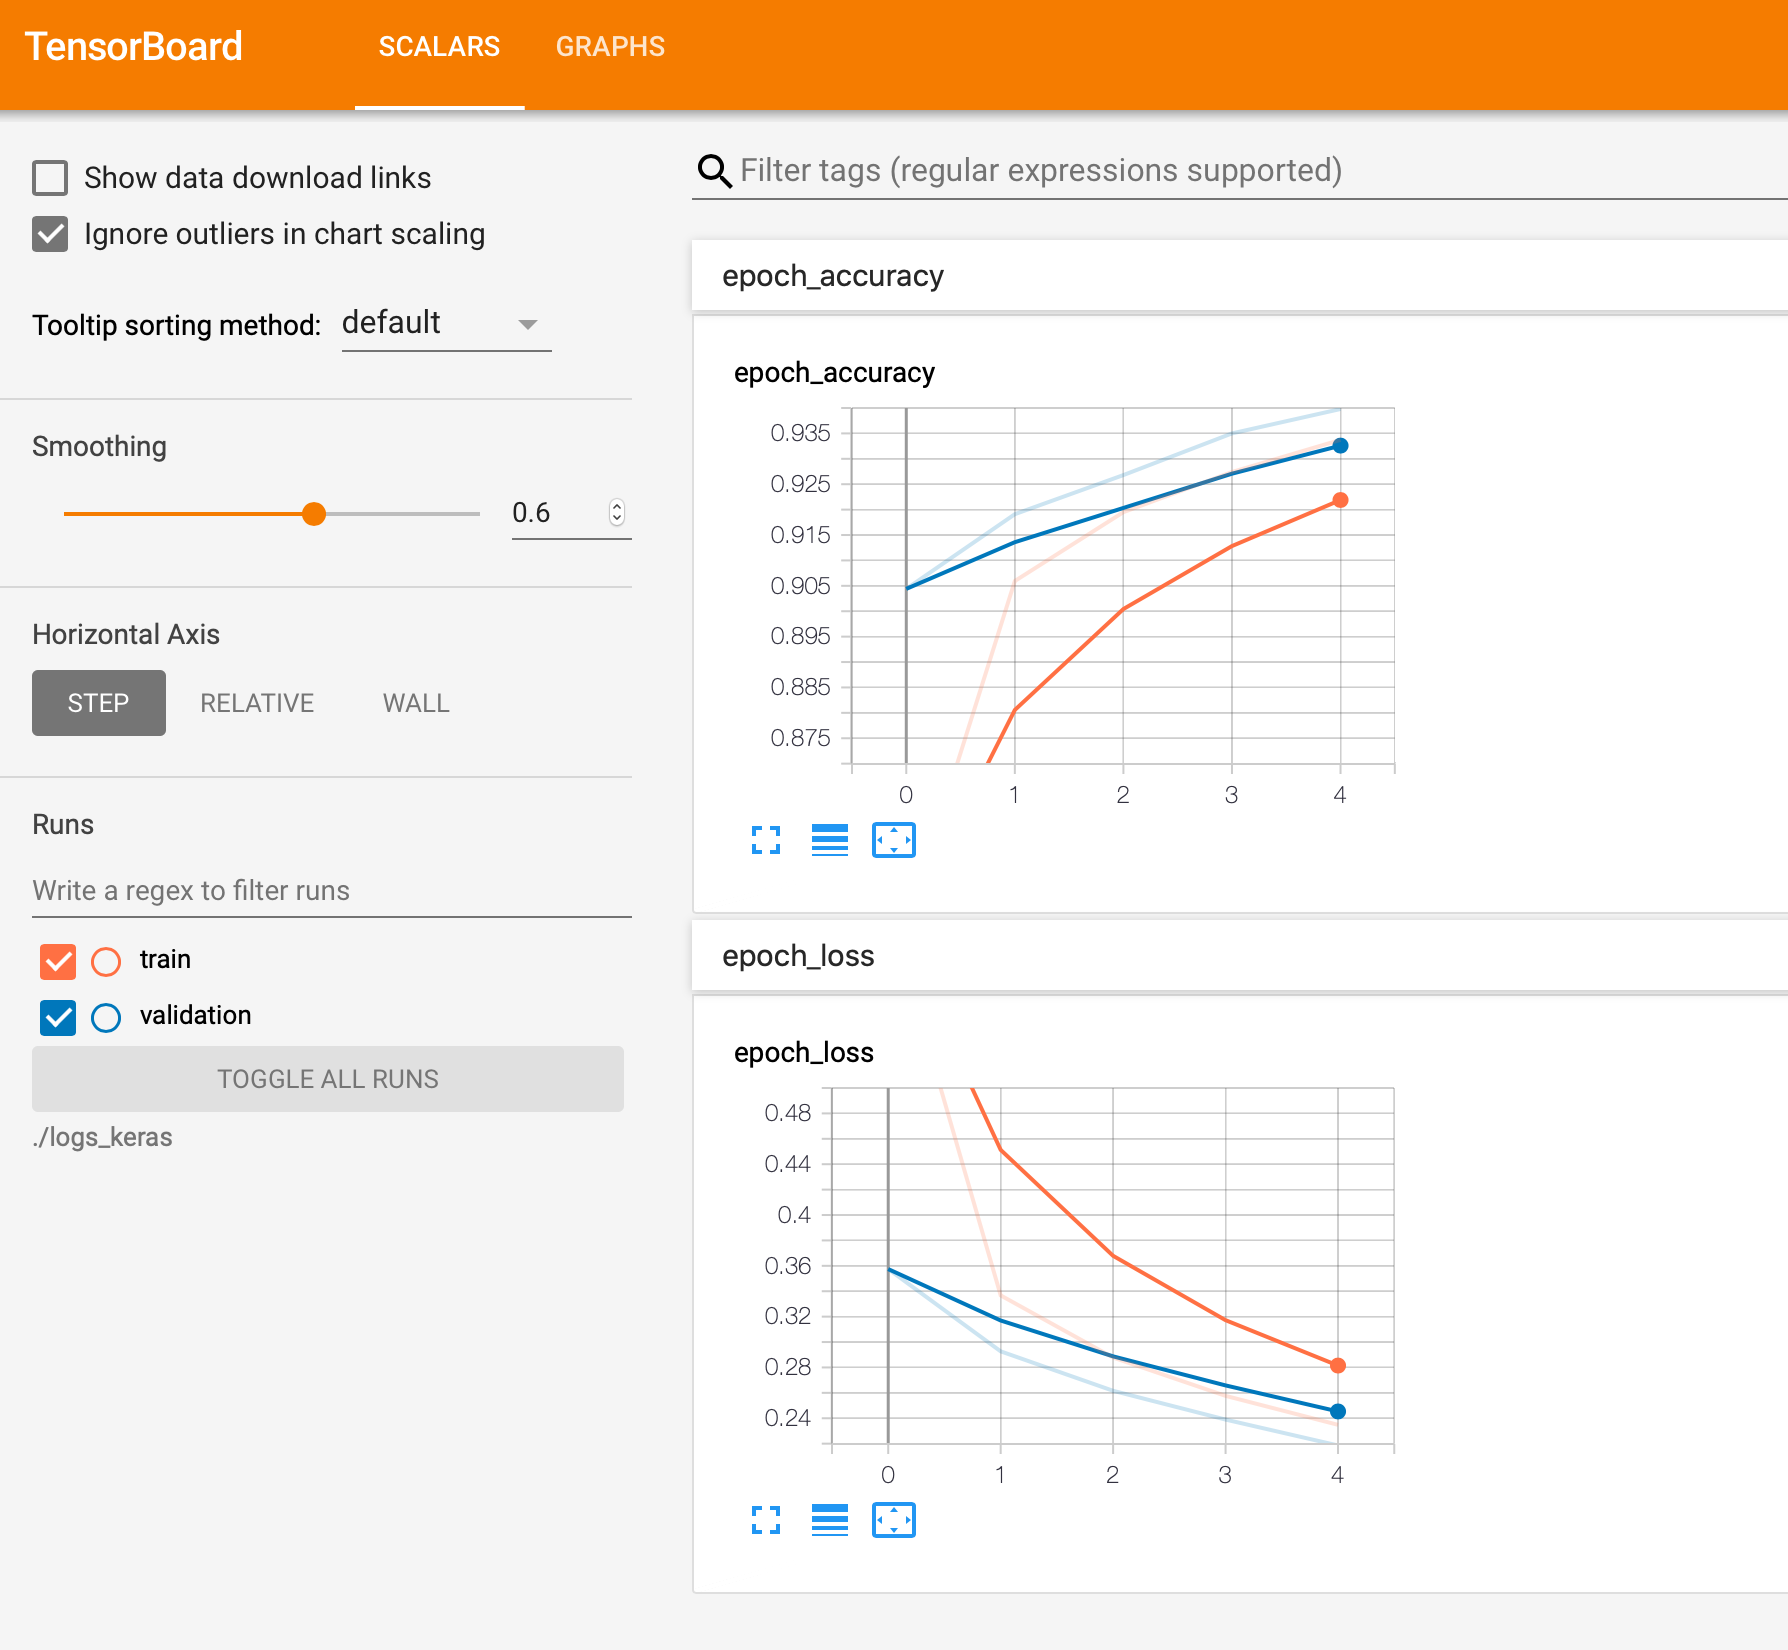

Image ref -> 


In [45]:
# TensorBoard URL output: 
display(Image(image_path + 'TensorBoard URL output.png', width=800, unconfined=True))
print('Image ref -> ')

## 6.1.1 - Other ways to use TensorBoard:

The pieces of information such as Scalars, Images, Histograms and Text will be stored under "tf.summary. 

### For Logging a Scalar:

For example, to __log a Scalar__, it should be noted that the Summary Writer and Log Information must be created first. The can be seen in the following code block.

In [46]:
writer = tf.summary.create_file_writer('./model_logs')

with writer.as_default():
    tf.summary.scalar('custom_log', 10, step = 3)

### For Logging Accuracy:

To do this, the step has to be specified where this can be the epoch number, the batch number or other custom information. Note that this corresponds with the X-axis in the TensorBoard diagrams. TF also provides tools that are for generating aggregates.

The following shows an example to __log for accuracy__:

In [47]:
accuracy = tf.keras.metrics.Accuracy()

# Examples only:
ground_truth, predictions = [1, 0, 1], [1, 0, 0]

accuracy.update_state(ground_truth, predictions)

tf.summary.scalar('accuracy', accuracy.result(), step = 4)

<tf.Tensor: id=134104, shape=(), dtype=bool, numpy=False>

### For other Metircs:

Such metrics can be Mean, Recall, and TruePositives. 

### Overall, setting these types of metrics logging up properly can be time consuming and complicated, however, it does improve and eases the debugging of errors/model or even manual logging these metrics.

## 6.2 - TensorFlow Addons and TensorFlow Extended (TFX):

The __TensorFlow Addons__ are a collection of additional functionalities that are gathered in a single repository which can be found in the following link: https://github.com/tensorflow/addons. It holds newer advancements in DL that could be unstable and therefore is not justifiable to be placed in the main library. 

The __TensorFlow Extended__ can be described as an End-to-End Machine Learning platform for TF. It does offer useful tools such as:

1. __TensorFlow Data Validation__ - It is a library for ML data exploration and validation. It can be used before building the model.
2. __TensorFlow Transform__ - It is a library for data preprocessing tools. This can help ensure that the training and evaluation data are processed in the same way for consistency purposes.
3. __TensorFlow Model Analysis__ - It is a library for the evaluation of the TF Models.
4. __TensorFlow Serving__ - It is a serving system to is for ML models, where Serving is a process of delivering the model predictions through a REST API.

The following diagram shows the Model Lifetime:

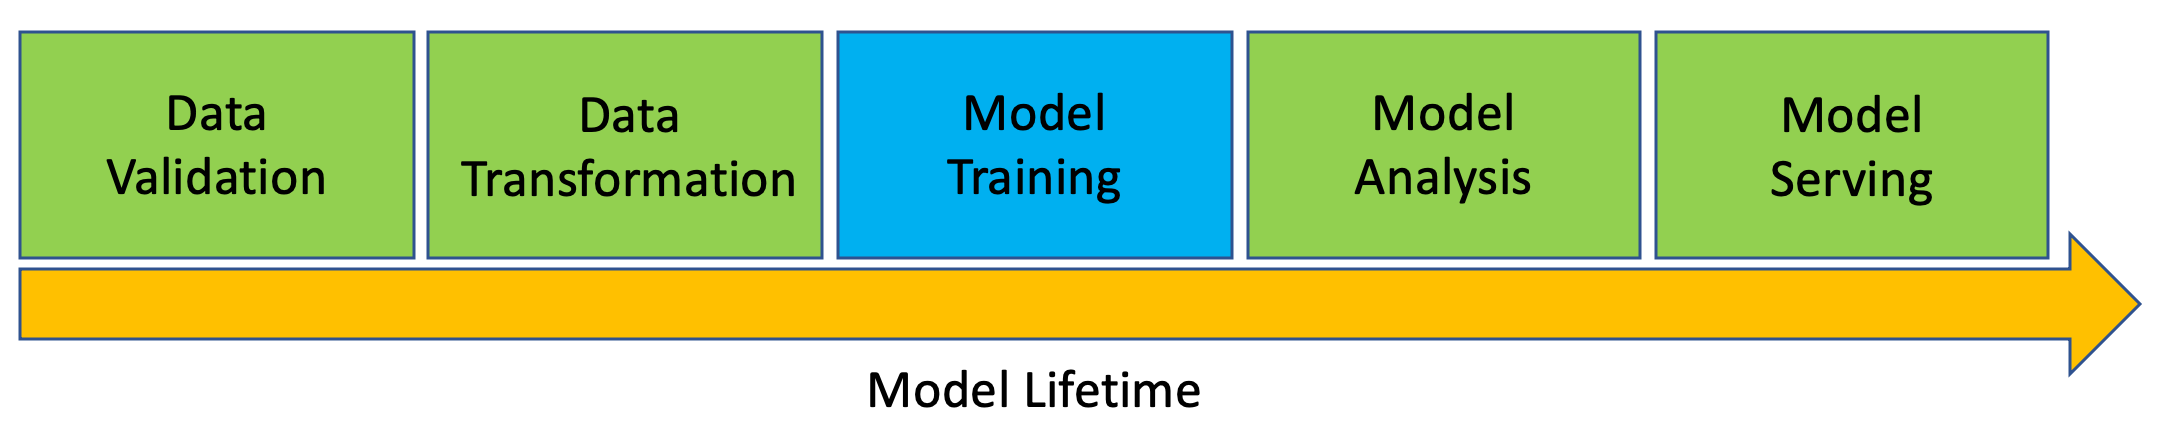

Image ref -> 


In [48]:
# Model Lifetime Diagram: 
display(Image(image_path + 'Model Lifetime.png', width=800, unconfined=True))
print('Image ref -> ')

## 6.3 - TensorFlow Lite and TensorFlow.js:

Ususally, the main version of TF library can be run on PCs or Macs or distributed computer systems, however with more and more variety of devices avaible today like mobile devices or embedded devices, a different version of F (__TensorFlow Lite__) is needed and designed to run model predictions/inference on these devices. It is largely composed of a converter transforming TF Models in a ".tflite" format. The interpreter can be installed in these devices to run the inferences on different tasks.

Next, TF moves onto development in web browser for DL tasks. This new version of TF (__TensorFlow.js__) does exactly this. It won't require any installation from the user's side of things and is still capable of making use of the GPU on the device where the wweb browser lives. 

## 7 - Summary:

From this project, I was able to learn a lot about Tensorflow 1 and 2 as well as its inner workings. I able to cover concepts of TF2 on tensors, graphs, AutoGraphs, its execution type (Eager and Lazy) and gradient tape. Additionally, advanced concepts such as "tf.functions", Variables, Estimator APIs and Distribution strategies were also covered. Learning about these have broaden my knowledge about TF2. Other than these concepts, I was also able to build a basic CV model with the Keras API (and also applied it with the Estimator API) to classify MNIST Digits images. I was also able to learn about the main tools for DL development with TF such as TensorBoard for monitoring purposes, TFX for preprocessing and analysis of the model. 